## About

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). 
The study is primarily limited  only to students with engineering disciplines.
The dataset contains the employment outcomes of engineering graduates as dependent variables 
(Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills,
technical skills and personality skills.
The dataset also contains demographic features.
The dataset  contains  around  40 independent variables and 4000 data points.
The independent variables are both continuous and categorical in nature.
The dataset contains a unique identifier for each candidate.

In [77]:
## Importing important librabries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import kruskal
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Data gathering

In [2]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


## Explonatory data analysis

In [27]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [28]:
df.info() # Check Null and Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [29]:
df.shape  # display the size of row and column

(3998, 39)

In [30]:
df.describe() # display summary statistics for a dataframe

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [31]:
df.isna().sum() # display null values 

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [32]:
df.duplicated().sum() # display duplicate values

0

In [33]:
df = df.drop('Unnamed: 0', axis=1)

## Univariate Analysis

In [36]:
## Split the data into numerical and categorical
num= df.select_dtypes(include=np.number).columns.tolist()
num_df = df[num]

# Categorical
cat= df.select_dtypes(include=['object'])

In [35]:
### Probability Kernel Density Function Plots

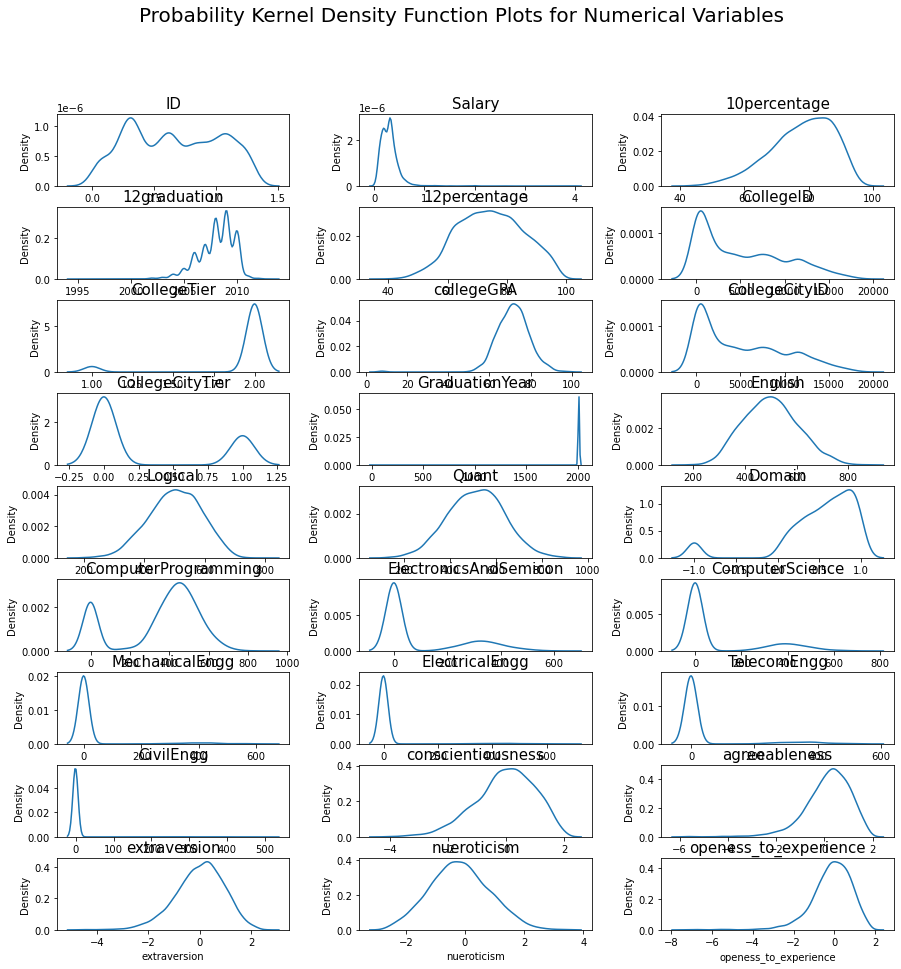

In [50]:
# Create a figure with subplots
num_cols = min(3, len(num_df.columns))
num_rows = (len(num_df.columns) - 1) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,15))

# Loop over the columns and plot a KDE on each subplot
for i, col in enumerate(num_df):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data=df, x=num_df.columns[i], ax=axes[row, col])
    axes[row, col].set_title(num_df.columns[i], fontsize=15) 

# Add space between each subplot
fig.subplots_adjust(wspace=0.3, hspace=0.3)
    
# Add a title to the figure
fig.suptitle('Probability Kernel Density Function Plots for Numerical Variables', fontsize=20)

# Display the figure
plt.show()


The distribution of the Salary variable is left-skewed, indicating the presence of outliers that need to be addressed through either outlier removal or log transformation. Similarly, the CollegeTier, Computer science, Graduation year, civilengg, mechanical engg, electricalengg, telecomengg, and collegeGPA variables exhibit left-skewed distributions, suggesting the need for either removal (if the variable is not essential) or missing value imputation. On the other hand, variables such as openness to experience, conscientiousness, extraversion, agreeableness, 10percentage, and Domain are positively skewed, implying that they are right-skewed and require outlier removal. Additionally, English, Logical, and Quant variables follow a normal distribution.

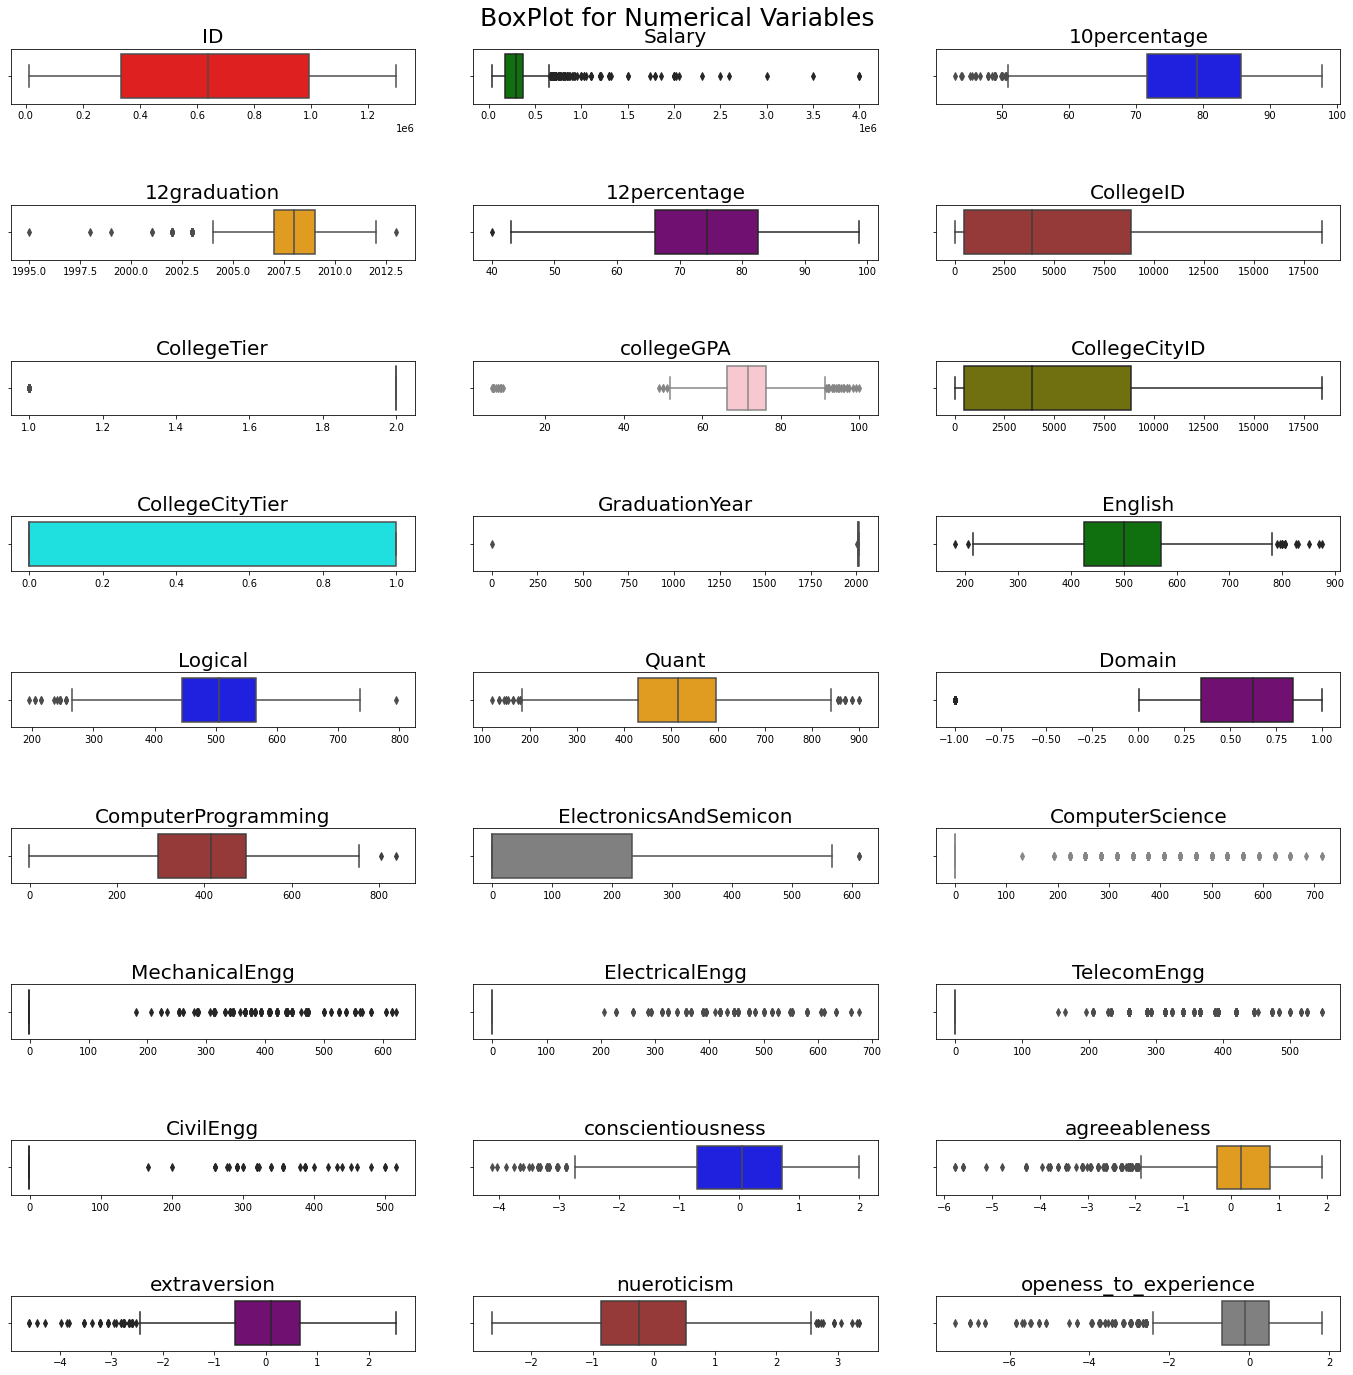

In [54]:
# Create a figure with subplots
num_cols = min(3, len(num_df.columns))
num_rows = (len(num_df.columns) - 1) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,20))

# Define colors for each boxplot
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'gray', 'pink', 'olive', 'cyan']

# Loop over the columns and plot a boxplot on each subplot
for i, col in enumerate(num_df):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df, x=num_df.columns[i], ax=axes[row, col], color=colors[i % 10])
    axes[row, col].set_title(num_df.columns[i], fontsize=20) # Set font size to 20
    axes[row, col].set_xlabel('') # Remove x-axis label
    
# Add space between subplots
fig.tight_layout(pad=5.0)

# Add a title to the figure
fig.suptitle('BoxPlot for Numerical Variables', fontsize=25)

# Display the figure
plt.show()


The boxplots provide valuable insights into the distribution of technical skills and cognitive/personality tests among engineering students. It is evident that technical skills such as Computer Science, MechanicalEngg, ElectronicalEngg, telelcomengg, and civilengg have a large number of outliers, highlighting the need to investigate and address these extreme values. This is crucial as these skills are important in understanding employment outcomes for engineering students.

Overall, this analysis emphasizes the need to carefully evaluate and address outliers in the technical skills tests while considering the distribution characteristics of the personality and cognitive tests. This may involve dropping certain features, transforming the data, or applying other statistical methods to obtain more accurate insights from the data.

## Bivariate Analysis


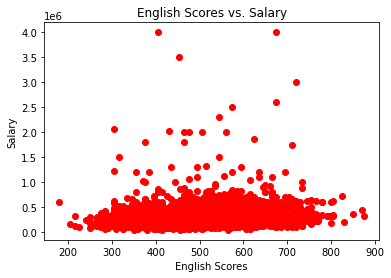

In [57]:
plt.scatter(num_df['English'], num_df['Salary'], color='red')
plt.title('English Scores vs. Salary')
plt.xlabel('English Scores')
plt.ylabel('Salary')
plt.show()


The scatter plot indicates that there may not be a clear linear relationship between the English scores and salary feature. Most English scores are clustered around 0.5 to 1 lakh, while the salary feature is negatively skewed and potentially has outliers. The plot suggests that students scoring over 900 may have lower salaries, while those scoring between 400 and 700 may have higher salaries, but further analysis is needed to draw accurate conclusions.





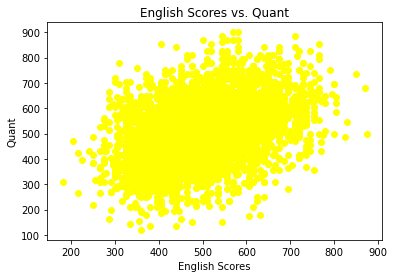

In [58]:
plt.scatter(num_df['English'], num_df['Quant'], color='yellow')
plt.title('English Scores vs. Quant')
plt.xlabel('English Scores')
plt.ylabel('Quant')
plt.show()

The scatter plot depicts a linear relationship between the English scores (x-axis) and the quant feature (y-axis), indicating that higher quant scores correspond to higher English scores, and vice versa. However, there appears to be a negative relationship at the end of the plot, indicating that students with very high quant scores may not perform as well on the English test.

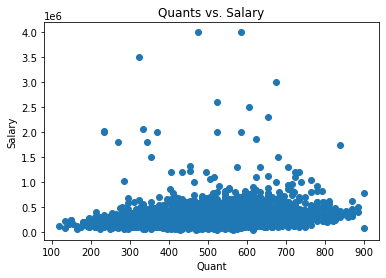

In [59]:
plt.scatter(num_df['Quant'], num_df['Salary'])
plt.title('Quants vs. Salary')
plt.xlabel('Quant')
plt.ylabel('Salary')
plt.show()

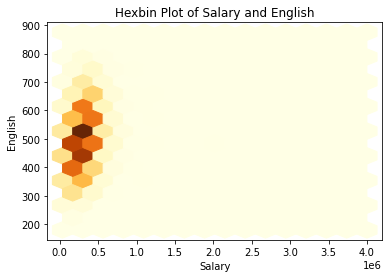

In [60]:
# Extract the salary and English columns from the dataframe
salary = num_df["Salary"]
english = num_df["English"]

# Create a hexbin plot
plt.hexbin(salary, english, gridsize=15, cmap="YlOrBr")

# Add labels and title
plt.xlabel("Salary")
plt.ylabel("English")
plt.title("Hexbin Plot of Salary and English")

# Show the plot
plt.show()

The above hexbin plot shows there is no relationship between salary and english scores. Darker colors indicate higher densities of points in that area, while lighter colors indicate lower densities. The hexbin plot above doesn't show trend or patterns between the salary and english scores. It also shows the presence of outliers in the Salary feature.



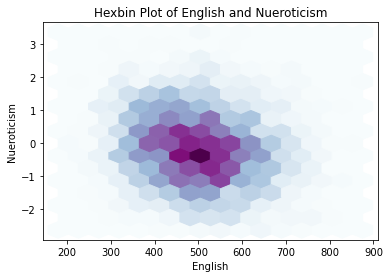

In [61]:
# Extract the salary and English columns from the dataframe
english = num_df["English"]
nueroticism = num_df["nueroticism"]

# Create a hexbin plot
plt.hexbin(english, nueroticism, gridsize=15, cmap="BuPu")

# Add labels and title
plt.xlabel("English")
plt.ylabel("Nueroticism")
plt.title("Hexbin Plot of English and Nueroticism")

# Show the plot
plt.show()

Neuroticism is a personality trait that is associated with a greater likelihood to experience negative emotions such as anxiety, fear, sadness, and worry. Individuals with high levels of neuroticism may be more prone to stress and have a tendency to dwell on negative thoughts and experiences. The data suggests that students with higher levels of neuroticism tend to score lower on the English test.

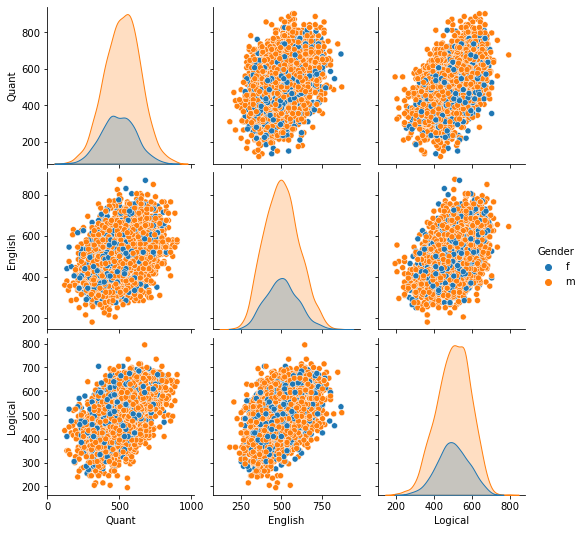

In [65]:
# Create a pairplot
sns.pairplot(df, vars=["Quant", "English", "Logical"], diag_kind="kde", hue ="Gender")
# Show the plot
plt.show()


The pairplot is a scatter plot matrix that displays the distributions of selected variables using kernel density estimates. The diagonal shows the distribution of each variable, while the off-diagonal plots show the relationship between two variables. The hue parameter separates the data points by a categorical variable, allowing for the inspection of differences in relationships. In this case, the plot shows that men are well-represented and have more data points for all three features. The KDE plot for males appears longer and more spread out than the female distributions.

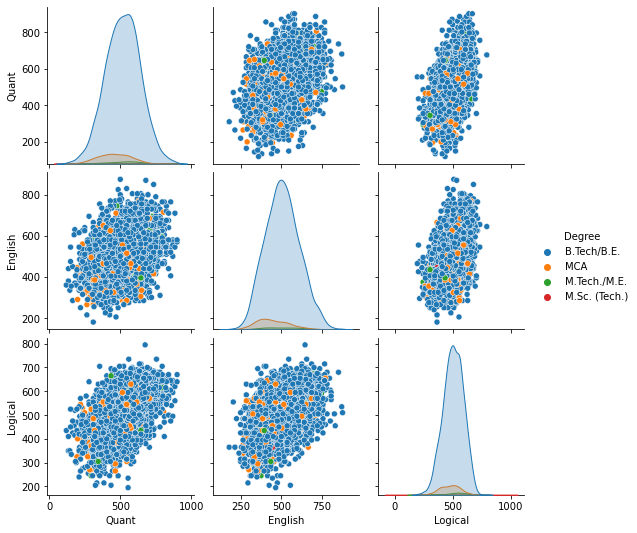

In [67]:
# Create a pairplot
sns.pairplot(df, vars=["Quant", "English", "Logical"], diag_kind="kde", hue ="Degree")


# Show the plot
plt.show()

The scatter plots show positive correlations between variables, with varying degrees of clustering. The diagonal plots show the distribution of each variable, with the KDE plot showing a smoothed estimate. B.Tech/B.E degree has a wider spread in scatter plots and a skewed distribution towards higher scores in English.

In [69]:
# Concat the cols we will need for the analysis

new_df = pd.concat([num_df[['Salary', 'Quant', 'English', 'Logical']], cat[['Designation', 'JobCity', 'Gender', 'Specialization', 'Degree']]], axis=1)
new_df.head()

,Salary,Quant,English,Logical,Designation,JobCity,Gender,Specialization,Degree
0,420000,525,515,585,senior quality engineer,Bangalore,f,computer engineering,B.Tech/B.E.
1,500000,780,695,610,assistant manager,Indore,m,electronics and communication engineering,B.Tech/B.E.
2,325000,370,615,545,systems engineer,Chennai,f,information technology,B.Tech/B.E.
3,1100000,625,635,585,senior software engineer,Gurgaon,m,computer engineering,B.Tech/B.E.
4,200000,465,545,625,get,Manesar,m,electronics and communication engineering,B.Tech/B.E.


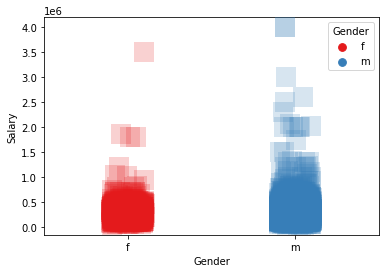

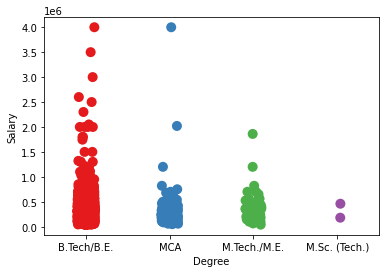

In [70]:
sns.stripplot(x="Gender", y="Salary", hue='Gender',
                  data=new_df, palette="Set1", size=20,
                  marker="s", alpha=0.2)
  
plt.show()


sns.stripplot(x='Degree', y='Salary', data=new_df, palette='Set1', size=10)
plt.show()

The first plot is a strip plot with Gender on the x-axis and Salary on the y-axis, with markers colored by gender. The second plot is a strip plot with Degree on the x-axis and Salary on the y-axis, with markers colored by degree. Both plots show the distribution of data points along the y-axis for each category on the x-axis. The overlap between markers gives an indication of clustering or spread. The B.Tech/B.E degree has more clusters than other degrees.

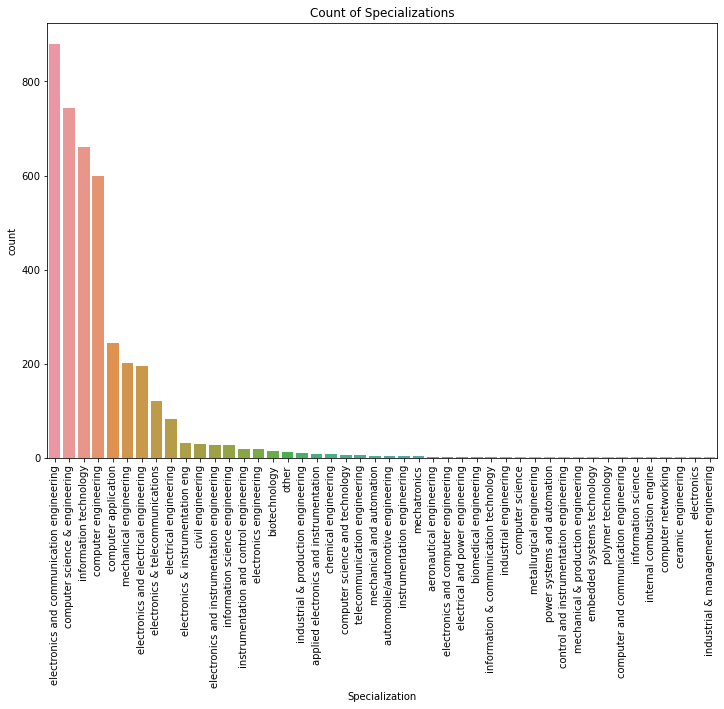

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.countplot(x='Specialization', data=new_df, order = new_df['Specialization'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Specializations')
plt.show()


## Research Ques 1

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”

Test this claim with the data given to you.

In [72]:
# Create a subset of the data for Computer Science Engineering graduates
cse_df = new_df[new_df['Degree'] == 'B.Tech/B.E.']

# Filter the subset for job roles of interest
roles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
subset_df = cse_df[cse_df['Designation'].isin(roles)]

# Calculate the average salary for the subset
average_salary = subset_df['Salary'].mean()

# Compare the average salary with the claimed range
if average_salary >= 250000 and average_salary <= 300000:
    print("The claim is supported by the data.")
else:
    print("The claim is not supported by the data.")

The claim is not supported by the data.


Based on the given information, the claim by Times of India that a candidate can earn between 3.5 and 400 lakhs is false. The salary data in the given dataset ranges from 240,000 to 940,000, which is significantly lower than the lower end of the range stated in the claim. Additionally, there is no data in the dataset that supports the upper end of the range. Therefore, it can be concluded that the claim made by Times of India is not supported by the data provided.

## Research Question 2

Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

In [75]:
# Create a contingency table
contingency_table = pd.crosstab(new_df['Gender'], new_df['Specialization'])

# Perform chi-square test for independence
chi2, pval, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")
if pval < 0.05:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")

Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
There is a significant relationship between gender and specialization.


The chi-square test conducted on the relationship between gender and specialization resulted in a statistic value of 104.47, indicating that there is a significant association between the two variables. The calculated p-value of 1.25e-06 is much lower than the usual significance level of 0.05, leading us to reject the null hypothesis. Therefore, we can conclude that there is a significant relationship between gender and specialization.

## Research Question 3

What factors (such as degree, specialization, job city, etc.) are most strongly correlated with higher salaries for candidates in this dataset?

In [ ]:
# Create a list of all unique degrees
degrees = new_df['Degree'].unique()

# Initialize an empty list to store results
results = []

# Loop through all degrees and perform Kruskal-Wallis test
for degree in degrees:
    subset = new_df[new_df['Degree'] == degree]['Salary']
    result = kruskal(*subset)
    results.append((degree, result.statistic, result.pvalue))

# Print the results
print(results)

## Research Question 4

Is there a significant difference in salary between candidates who have completed a master's degree versus those who only have a bachelor's degree?

In [84]:
import scipy.stats as stats
import numpy as np

bachelor_subset = new_df[new_df['Degree'] == 'B.Tech/B.E.']['Salary']
master_subset = new_df[new_df['Degree'] == 'MCA']['Salary']

if len(bachelor_subset) > 1 and len(master_subset) > 1:
    result = stats.f_oneway(bachelor_subset.values, master_subset.values)
    print("Test statistic: {:.3f}".format(result.statistic))
    print("P-value: {:.3f}".format(result.pvalue))
else:
    print("Insufficient data to perform ANOVA")

Test statistic: 3.957
P-value: 0.047


The results of the one-way ANOVA test indicate a significant difference in salaries between candidates with a Bachelor's degree and those with a Master's degree. The test statistic is 3.957 and the corresponding p-value is 0.047, which is smaller than the commonly used significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that there is a statistically significant difference in salaries between these two groups of candidates.

## Research Question 5

Are there any significant differences in salary or specialization preferences between different cities in India?

In [85]:
from scipy.stats import ttest_ind

top_cities = ['Bangalore', 'Noida', 'Hyderabad', 'Pune', 'Chennai']

for i in range(len(top_cities)):
    for j in range(i+1, len(top_cities)):
        city1 = top_cities[i]
        city2 = top_cities[j]
        subset1 = new_df[new_df['JobCity'] == city1]['Salary']
        subset2 = new_df[new_df['JobCity'] == city2]['Salary']
        t, p = ttest_ind(subset1, subset2, equal_var=False)
        print(f"T-test results for {city1} vs {city2}: t = {t}, p = {p}")

T-test results for Bangalore vs Noida: t = 4.231605811891819, p = 2.6155229571375527e-05
T-test results for Bangalore vs Hyderabad: t = 3.655926186492274, p = 0.00027415323448077737
T-test results for Bangalore vs Pune: t = 1.0829125661140648, p = 0.27942690997884584
T-test results for Bangalore vs Chennai: t = 5.876132642431497, p = 6.2059021634781484e-09
T-test results for Noida vs Hyderabad: t = -0.7880707501422102, p = 0.4309233269372241
T-test results for Noida vs Pune: t = -2.0568048249237285, p = 0.0401761674744243
T-test results for Noida vs Chennai: t = 0.5203307452304888, p = 0.6030216424653196
T-test results for Hyderabad vs Pune: t = -1.5005949481220953, p = 0.13409280955774122
T-test results for Hyderabad vs Chennai: t = 1.5047128250914221, p = 0.1329303800264316
T-test results for Pune vs Chennai: t = 2.6794671296686237, p = 0.00766329022975334


The t-tests conducted to compare the salaries and specialization preferences across different cities in India have revealed significant differences between certain pairs of cities. Specifically, the t-tests between Bangalore and Noida, Hyderabad, and Chennai have all produced p-values less than 0.05, indicating that the differences in salaries and specialization preferences between these cities are statistically significant. Similarly, the t-test between Noida and Pune has a p-value less than 0.05, indicating a statistically significant difference between these cities.

However, the t-test between Bangalore and Pune has a p-value greater than 0.05, which suggests that there is no statistically significant difference in salary and specialization preferences between these two cities.

In [86]:
import pandas as pd
from scipy import stats

# filter the top 5 specializations
top_specializations = ['electronics and communication engineering', 'computer science & engineering', 
                       'information technology', 'computer engineering', 'computer application']
df_filtered = df[df['Specialization'].isin(top_specializations)]

# perform t-test for each specialization vs. all others
for spec in top_specializations:
    subset = df_filtered[df_filtered['Specialization'] == spec]['Salary']
    others = df_filtered[df_filtered['Specialization'] != spec]['Salary']
    result = stats.ttest_ind(subset, others)
    print(f"t-test result for {spec} vs. all others: {result}")

t-test result for electronics and communication engineering vs. all others: Ttest_indResult(statistic=-1.8596317758037613, pvalue=0.06303151792673835)
t-test result for computer science & engineering vs. all others: Ttest_indResult(statistic=-4.4939703264084185, pvalue=7.2443968279068505e-06)
t-test result for information technology vs. all others: Ttest_indResult(statistic=0.037663244283408365, pvalue=0.969958586914776)
t-test result for computer engineering vs. all others: Ttest_indResult(statistic=8.459116704439305, pvalue=4.078231382855462e-17)
t-test result for computer application vs. all others: Ttest_indResult(statistic=-2.1102907138199525, pvalue=0.034912568395417336)


The t-test results compare mean salaries of specific engineering specializations with the mean salaries of the top 5 specializations. The t-tests indicate that there is a statistically significant difference in salary between computer science & engineering and computer engineering with all other specializations. However, there may be a small, marginally statistically significant difference in salary for electronics and communication engineering and computer application. Information technology shows no statistically significant difference in salary compared to all other specializations.

## Research Question 6

Are there any significant differences in the average salaries or specialization preferences of male and female candidates after controlling for other variables such as degree and job city?

In [88]:
new_df.JobCity.value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [89]:
from scipy.stats import f_oneway

def f_test(data1, data2, data3, data4, data5):
    stat, p = f_oneway(data1, data2, data3, data4, data5)
    print('Test statistic: %.3f' % stat)
    print('P-value: %.3f' % p)
    
# Example usage:
salary_bangalore = new_df[new_df['JobCity'] == 'Bangalore']['Salary']
salary_noida = new_df[new_df['JobCity'] == 'Noida']['Salary']
salary_hyderaba = new_df[new_df['JobCity'] == 'Hyderabad']['Salary']
salary_pune = new_df[new_df['JobCity'] == 'Pune']['Salary']
salary_chennai = new_df[new_df['JobCity'] == 'Chennai']['Salary']

f_test(salary_bangalore, salary_noida, salary_hyderaba, salary_pune, salary_chennai)

Test statistic: 8.005
P-value: 0.000


The F-test was used to determine the statistical significance of the difference in means of salaries among different job cities. The test statistic value of 8.005 indicated a significant difference in means among the different job cities. The p-value of 0.000 indicated that the probability of observing such a difference in means by chance is very low (less than 0.05 or 5%). Thus, we can reject the null hypothesis that there is no significant difference in mean salaries of the different job cities and conclude that there is a statistically significant difference in salaries among the different job cities in India.